# Counting merger trees


In [42]:
import numpy as np
import pylab as plt
from math import factorial as fact
from more_itertools import distinct_permutations as perm

In [44]:
# Number of different tree shapes WITH ONLY ONE BRANCH follows fibonacci sequence

def elem(N,i):
    return fact(N-2-i)/fact(i)/fact(N-2-2*i)

N_list = np.arange(4,30)
n_trees_list = []

for N in N_list:
    i_max = int((N-2)/2) 
    i_list = np.arange(1, i_max+1)
    n_trees = 1
    for i in i_list:
        n_trees += elem(N,i)
    n_trees_list.append(n_trees)

phi = (1 + np.sqrt(5))/2
psi = (1 - np.sqrt(5))/2
n_list = np.arange(3,30)
fibo_list = [(phi**n - psi**n)/np.sqrt(5) for n in n_list]

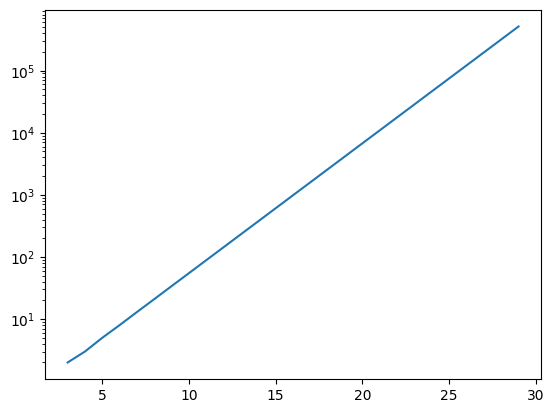

In [45]:
plt.plot(n_list, fibo_list)
plt.yscale('log')

Usiamo la seguente convenzione:
- 0 = tree con 3 elementi
- 1 = full tree con 4 elementi

Queste sono le prime due strutture con una effettiva differenza, con 3 livelli ciascuna. Sostanzialmente questa è la base con cui si possono descrivere tutti i possibili branch.


In [47]:
# Print all possible trees (of equal mass BHs)

tree_list = []
N = 10 # number of BHs
i_max = int((N-2)/2) 
i_list = np.arange(1, i_max+1)

first = np.full(N-2, 0)
tree_list.append(first.tolist())

for i in i_list:
    tree = np.copy(first[i:])
    tree[:i] = 1
    p = list(perm(tree))
    tree_list.append(p)
    

Per contare i possibili trees con N BHs si contano i branch unici con N nodi, e poi si contano le combinazioni dei branch la cui somma degli N fa il numero di BH che stiamo studiando. Le combinazioni di branch iniziano a servire con N = 6, quando si possono unire due branch di tipo (0,0):

- N = 6 (0,0)
- N = 7 (0,1) (0,00)
- N = 8 (1,1) (0,000) (0,01) (0,10)

Per contare i possibili trees in funzione di N serve salvare in ordine tutti i branch e tutte le loro combinazioni per ogni N, per poterli usare in modo ricorsivo.